In [10]:
#Load the data
#Loading the jobs dataset
import pandas as pd
df_jobs = pd.read_csv(r"/content/Combined_Jobs_Final.csv")
df_jobs.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [14]:
df_jobs.columns

Index(['Job.ID', 'Provider', 'Status', 'Slug', 'Title', 'Position', 'Company',
       'City', 'State.Name', 'State.Code', 'Address', 'Latitude', 'Longitude',
       'Industry', 'Job.Description', 'Requirements', 'Salary',
       'Listing.Start', 'Listing.End', 'Employment.Type', 'Education.Required',
       'Created.At', 'Updated.At'],
      dtype='object')

In [15]:
cols = ['Job.ID']+['Title']+['Position']+ ['Company']+['City']+['Employment.Type']+['Job.Description']
df_jobs =df_jobs[cols]
df_jobs.columns = ['Job.ID', 'Title', 'Position', 'Company','City', 'Empl_type','Job_Description']
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,"Located at the heart of Hollywood, we are one ..."


In [17]:
import pandas as pd
import numpy as np
import nltk

In [18]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job.ID           84090 non-null  int64 
 1   Title            84090 non-null  object
 2   Position         84090 non-null  object
 3   Company          81819 non-null  object
 4   City             83955 non-null  object
 5   Empl_type        84080 non-null  object
 6   Job_Description  84034 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.5+ MB


In [19]:
# prompt: Exploratory Data Analysis
# First check the NA's

df_jobs.isnull().sum()

,0
Job.ID,0
Title,0
Position,0
Company,2271
City,135
Empl_type,10
Job_Description,56


In [20]:
cols = ['Job.ID']+['Title']+['Position']+ ['Company']+['City']+['Empl_type']+['Job_Description']
df_jobs =df_jobs[cols]
df_jobs.columns = ['Job.ID', 'Title', 'Position', 'Company','City', 'Empl_type','Job_Description']
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,"Located at the heart of Hollywood, we are one ..."


In [21]:
# checking for the null values again.
df_jobs.isnull().sum()

,0
Job.ID,0
Title,0
Position,0
Company,2271
City,135
Empl_type,10
Job_Description,56


Let´s check the NA's by plotting them

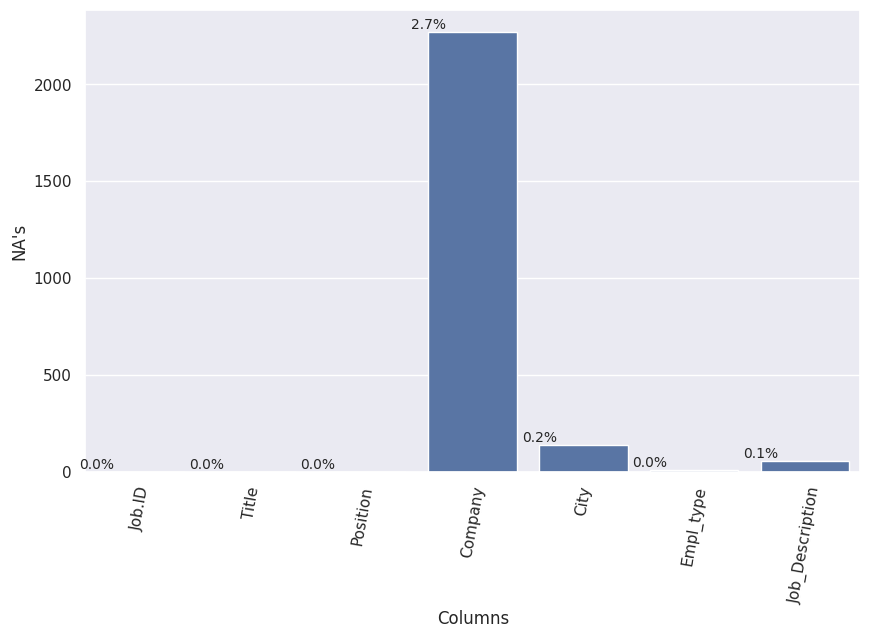

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = df_jobs.columns
y = df_jobs.isnull().sum()
plt.figure(figsize=(10,6))
sns.set()
sns.barplot(x=x,y=y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(),
            height + 2,
            str(100*round(int(height)/df_jobs.shape[0], 3)) +"%",
            fontsize=10, ha='center', va='bottom')
ax.set_xlabel("Columns")
ax.set_ylabel("NA's")
plt.xticks(rotation=80)

plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given
because sns.barplot() expects keyword arguments, not positional arguments.




selecting NaN rows of city

In [23]:
df_nan_city = df_jobs[pd.isnull(df_jobs['City'])]
print(df_nan_city.shape)
df_nan_city.head()


(135, 7)


,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
3425,142044,Registered Nurse (RN) @ St. Francis Hospital,Registered Nurse (RN),St. Francis Hospital,NaN,Full-Time/Part-Time,Under the direction of the Clinical Coordinato...
3433,142054,Sales Representative - Business Development Op...,Sales Representative - Business Development Op...,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
3434,142055,New Business Executive @ CHI Payment Systems,New Business Executive,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
3435,142056,Outside Sales Representative (Business Develop...,Outside Sales Representative (Business Develop...,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
3436,142057,Outside Sales Representative @ CHI Payment Sys...,Outside Sales Representative,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."


In [24]:
df_nan_city.groupby(['Company'])['City'].count()

,City
Company,
Academic Year In America,0
CBS Healthcare Services and Staffing,0
CHI Payment Systems,0
Driveline Retail,0
Educational Testing Services,0
Genesis Health System,0
Genesis Health Systems,0
Home Instead Senior Care,0
St. Francis Hospital,0


We see that there are only 9 companies cities that are having NaN values so it must be manually adding their head quarters (by simply searching at google)

In [25]:
#replacing nan with thier headquarters location
df_jobs['Company'] = df_jobs['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')
df_jobs.loc[df_jobs.Company == 'CHI Payment Systems', 'City'] = 'Illinois'
df_jobs.loc[df_jobs.Company == 'Academic Year In America', 'City'] = 'Stamford'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing ', 'City'] = 'Urbandale'
df_jobs.loc[df_jobs.Company == 'Driveline Retail', 'City'] = 'Coppell'
df_jobs.loc[df_jobs.Company == 'Educational Testing Services', 'City'] = 'New Jersey'
df_jobs.loc[df_jobs.Company == 'Genesis Health System', 'City'] = 'Davennport'
df_jobs.loc[df_jobs.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
df_jobs.loc[df_jobs.Company == 'St. Francis Hospital', 'City'] = 'New York'
df_jobs.loc[df_jobs.Company == 'Volvo Group', 'City'] = 'Washington'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'

In [26]:
df_jobs.isnull().sum()

,0
Job.ID,0
Title,0
Position,0
Company,2271
City,0
Empl_type,10
Job_Description,56


In [27]:
#The employement type NA are from Uber so I assume as part-time and full time
df_nan_emp = df_jobs[pd.isnull(df_jobs['Empl_type'])]
df_nan_emp.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
10768,153197,Driving Partner @ Uber,Driving Partner,Uber,San Francisco,NaN,Uber is changing the way the world moves. From...
10769,153198,Driving Partner @ Uber,Driving Partner,Uber,Los Angeles,NaN,Uber is changing the way the world moves. From...
10770,153199,Driving Partner @ Uber,Driving Partner,Uber,Chicago,NaN,Uber is changing the way the world moves. From...
10771,153200,Driving Partner @ Uber,Driving Partner,Uber,Boston,NaN,Uber is changing the way the world moves. From...
10772,153201,Driving Partner @ Uber,Driving Partner,Uber,Ann Arbor,NaN,Uber is changing the way the world moves. From...


In [28]:
df_jobs['Empl_type'].unique()

array(['Part-Time', 'Full-Time/Part-Time', 'Seasonal/Temp', 'Per Diem',
       'Intern', nan, 'Full-Time', 'Contract', 'Temporary/seasonal'],
      dtype=object)

In [29]:
#replacing na values with part time/full time
df_jobs['Empl_type']=df_jobs['Empl_type'].fillna('Full-Time/Part-Time')
df_jobs.groupby(['Empl_type'])['Company'].count()
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,"Located at the heart of Hollywood, we are one ..."


Creating the jobs corpus combining the columns of position, company, city, emp_type and position create title column with combined text

In [30]:
df_jobs["text"] = df_jobs["Position"].map(str) + " " + df_jobs["Company"] +" "+ df_jobs["City"]+ " "+df_jobs['Empl_type']+" "+df_jobs['Job_Description'] +" "+df_jobs['Title']
df_jobs.head(2)

,Job.ID,Title,Position,Company,City,Empl_type,Job_Description,text
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...,Server Tacolicious Palo Alto Part-Time Tacolic...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...,Kitchen Staff/Chef Claude Lane San Francisco P...


In [31]:
df_all = df_jobs[['Job.ID', 'text', 'Title']]

df_all = df_all.fillna(" ")

df_all.head()

,Job.ID,text,Title
0,111,Server Tacolicious Palo Alto Part-Time Tacolic...,Server @ Tacolicious
1,113,Kitchen Staff/Chef Claude Lane San Francisco P...,Kitchen Staff/Chef @ Claude Lane
2,117,Bartender Machka Restaurants Corp. San Francis...,Bartender @ Machka Restaurants Corp.
3,121,Server Teriyaki House Brisbane Part-Time ● Se...,Server @ Teriyaki House
4,127,Kitchen Staff/Chef Rosa Mexicano - Sunset Los ...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset


In [32]:
df_all.shape

(84090, 3)

In [33]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [34]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

Cleaning the jobs corpus

In [35]:
import nltk
nltk.download('punkt_tab')  # Only needs to run once per environment

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [36]:
df_all['text'] = df_all['text'].apply(clean_txt)

Finally we ended we a clean text for the jobs dataset:

In [37]:
df_all.head()

,Job.ID,text,Title
0,111,server tacolicious palo alto part time tacolic...,Server @ Tacolicious
1,113,kitchen staff chef claude lane san francisco p...,Kitchen Staff/Chef @ Claude Lane
2,117,bartender machka restaurants corp san francisc...,Bartender @ Machka Restaurants Corp.
3,121,server teriyaki house brisbane part time serve...,Server @ Teriyaki House
4,127,kitchen staff chef rosa mexicano sunset los an...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset


TF-IDF ( Term Frequency - Inverse Document Frequency )

In [38]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((df_all['text'])) #fitting and transforming the vector
tfidf_jobid

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8270263 stored elements and shape (84090, 50895)>

Cretating the User Corpus
Let's Take the dataset called job views.

In [39]:
df_job_view = pd.read_csv("/content/Job_Views.csv")
df_job_view.head(2)

,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC


In this case we will use only the columns 'Applicant.ID', 'Job.ID', 'Position', 'Company','City'

In [40]:
df_job_view = df_job_view[['Applicant.ID', 'Job.ID', 'Position', 'Company','City']]
df_job_view["select_pos_com_city"] = df_job_view["Position"].map(str) + "  " + df_job_view["Company"] +"  "+ df_job_view["City"]
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].map(str).apply(clean_txt)
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].str.lower()
df_job_view = df_job_view[['Applicant.ID','select_pos_com_city']]
df_job_view.head()

/tmp/ipython-input-40-556597486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job_view["select_pos_com_city"] = df_job_view["Position"].map(str) + "  " + df_job_view["Company"] +"  "+ df_job_view["City"]


,Applicant.ID,select_pos_com_city
0,10000,cashier valet need wallypark newark
1,10000,macys seasonal retail fragrance cashier garden...
2,10001,part time showroom sales cashier grizzly indus...
3,10002,event specialist part time advantage sales mar...
4,10002,bonefish kitchen staff bonefish grill greenville


Experience Dataset


In [41]:
#Experience
df_experience = pd.read_csv("/content/Experience.csv")
df_experience.head(2)

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC


In [42]:
#taking only Position
df_experience= df_experience[['Applicant.ID','Position.Name']]
#cleaning the text
df_experience['Position.Name'] = df_experience['Position.Name'].map(str).apply(clean_txt)
df_experience.head()

,Applicant.ID,Position.Name
0,10001,account manager sales administration quality a...
1,10001,electronics technician item master controller
2,10001,machine operator
3,10003,maintenance technician
4,10003,electrical helper


In [43]:
df_experience =  df_experience.sort_values(by='Applicant.ID')
df_experience = df_experience.fillna(" ")
df_experience.head()

,Applicant.ID,Position.Name
2762,2,writer uloop blog
2763,2,volunteer
3759,3,market intern
3757,3,prep cook
3758,3,server


In [44]:
#adding same rows to a single row
df_experience = df_experience.groupby('Applicant.ID', sort=False)['Position.Name'].apply(' '.join).reset_index()
df_experience.head(5)

,Applicant.ID,Position.Name
0,2,writer uloop blog volunteer
1,3,market intern prep cook server
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


Position of Interest dataset

In [45]:
#Position of interest
df_poi =  pd.read_csv("Positions_Of_Interest.csv", sep=',')
df_poi = df_poi.sort_values(by='Applicant.ID')
df_poi.head()

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
6437,96,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1154,153,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1155,153,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1156,153,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
1157,153,Customer Service Rep,2014-08-14 15:56:46 UTC,2015-03-08 19:56:39 UTC


In [46]:
df_poi = df_poi.drop('Updated.At',axis= 1)
df_poi = df_poi.drop('Created.At',axis= 1)

In [47]:
df_poi

,Applicant.ID,Position.Of.Interest
6437,96,Server
1154,153,Server
1155,153,Host
1156,153,Barista
1157,153,Customer Service Rep
...,...,...
1149,14520,Sales Rep
1150,14522,Receptionist
1151,14522,Book Keeper
1152,14522,Personal assistant


In [48]:
#cleaning the text
df_poi['Position.Of.Interest']=df_poi['Position.Of.Interest'].map(str).apply(clean_txt)
df_poi = df_poi.fillna(" ")
df_poi.head(10)

,Applicant.ID,Position.Of.Interest
6437,96,server
1154,153,server
1155,153,host
1156,153,barista
1157,153,customer service rep
1158,153,sales rep
1953,256,receptionist
1952,256,host
1956,256,sales rep
1955,256,customer service rep


In [49]:
df_poi = df_poi.groupby('Applicant.ID', sort=True)['Position.Of.Interest'].apply(' '.join).reset_index()
df_poi.head()

,Applicant.ID,Position.Of.Interest
0,96,server
1,153,server host barista customer service rep sales...
2,256,receptionist host sales rep customer service r...
3,438,server customer service rep barista host
4,568,customer service rep receptionist book keeper


Creating the final user dataset by merging all the users datasets
Merging jobs and experience dataframes

In [50]:
df_jobs_exp = df_job_view.merge(df_experience, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp = df_jobs_exp.fillna(' ')
df_jobs_exp = df_jobs_exp.sort_values(by='Applicant.ID')
df_jobs_exp.head()

,Applicant.ID,select_pos_com_city,Position.Name
0,2,,writer uloop blog volunteer
1,3,,market intern prep cook server
2,6,,project assistant
3,8,,deli clerk server cashier food prep order taker
4,11,,cashier


In [51]:
df_jobs_exp_poi = df_jobs_exp.merge(df_poi, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp_poi = df_jobs_exp_poi.fillna(' ')
df_jobs_exp_poi = df_jobs_exp_poi.sort_values(by='Applicant.ID')
df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest
0,2,,writer uloop blog volunteer,
1,3,,market intern prep cook server,
2,6,,project assistant,
3,8,,deli clerk server cashier food prep order taker,
4,11,,cashier,


In [52]:
df_jobs_exp_poi["text"] = df_jobs_exp_poi["select_pos_com_city"].map(str) + df_jobs_exp_poi["Position.Name"] +" "+ df_jobs_exp_poi["Position.Of.Interest"]

df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest,text
0,2,,writer uloop blog volunteer,,writer uloop blog volunteer
1,3,,market intern prep cook server,,market intern prep cook server
2,6,,project assistant,,project assistant
3,8,,deli clerk server cashier food prep order taker,,deli clerk server cashier food prep order tak...
4,11,,cashier,,cashier


Select only "Applicant.ID" and "text" columns:

In [53]:
df_final_person= df_jobs_exp_poi[['Applicant.ID','text']]
df_final_person.head()

,Applicant.ID,text
0,2,writer uloop blog volunteer
1,3,market intern prep cook server
2,6,project assistant
3,8,deli clerk server cashier food prep order tak...
4,11,cashier


In [54]:
df_final_person.columns = ['Applicant_id','text']
df_final_person.head()

,Applicant_id,text
0,2,writer uloop blog volunteer
1,3,market intern prep cook server
2,6,project assistant
3,8,deli clerk server cashier food prep order tak...
4,11,cashier


In [55]:
df_final_person['text'] = df_final_person['text'].apply(clean_txt)
df_final_person.head()

/tmp/ipython-input-55-1368984875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_person['text'] = df_final_person['text'].apply(clean_txt)


,Applicant_id,text
0,2,writer uloop blog volunteer
1,3,market intern prep cook server
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


For test the recommender we select the user which ID is 326

In [56]:
u = 326
index = np.where(df_final_person['Applicant_id'] == u)[0][0]
user_q = df_final_person.iloc[[index]]
user_q

,Applicant_id,text
186,326,java developer


The recommender systems
Computing cosine similarity using tfidf

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(user_q['text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [58]:
output2 = list(cos_similarity_tfidf)

In [59]:
output2

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.03655204]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),


In [60]:
 df_all

,Job.ID,text,Title
0,111,server tacolicious palo alto part time tacolic...,Server @ Tacolicious
1,113,kitchen staff chef claude lane san francisco p...,Kitchen Staff/Chef @ Claude Lane
2,117,bartender machka restaurants corp san francisc...,Bartender @ Machka Restaurants Corp.
3,121,server teriyaki house brisbane part time serve...,Server @ Teriyaki House
4,127,kitchen staff chef rosa mexicano sunset los an...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset
...,...,...,...
84085,82,book keeper national japanese american histori...,Book Keeper @ National Japanese American Histo...
84086,83,kitchen staff chef emporio rulli larkspur part...,Kitchen Staff/Chef @ Emporio Rulli
84087,84,driver onigilly san francisco part time onigil...,Driver @ Onigilly
84088,88,line cook machka restaurants corp san francisc...,Line Cook @ Machka Restaurants Corp.


The recommender systems
Computing cosine similarity using tfidf

In [63]:
from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(user_q['text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [64]:
cos_similarity_tfidf

In [65]:
user_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 50895)>

In [66]:
output2 = list(cos_similarity_tfidf)

In [67]:
output2

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.03655204]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),


Function to get the top-N recomendations order by score

In [68]:
def get_recommendation(top, df_all, scores):
  recommendation = pd.DataFrame(columns = ['ApplicantID', 'JobID',  'title', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'ApplicantID'] = u
      recommendation.at[count, 'JobID'] = df_all['Job.ID'][i]
      recommendation.at[count, 'title'] = df_all['Title'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

The top recommendations using TF-IDF

In [70]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top,df_all, list_scores)

,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.749398
1,326,294684,Java Developer @ Kavaliro,0.740886
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.736954
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.671609
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.644975
5,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.625471
6,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.592246
7,326,245753,Java Administrator @ ConsultNet,0.530208
8,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.510471
9,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.486782


Using Count Vectorizer

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_jobid = count_vectorizer.fit_transform((df_all['text'])) #fitting and transforming the vector
count_jobid

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8270263 stored elements and shape (84090, 50895)>

In [73]:
from sklearn.metrics.pairwise import cosine_similarity
user_count = count_vectorizer.transform(user_q['text'])
cos_similarity_countv = map(lambda x: cosine_similarity(user_count, x),count_jobid)

In [74]:
output2 = list(cos_similarity_countv)

The top recommendations using CountVectorizer

In [75]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, df_all, list_scores)

,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.635001
1,326,294684,Java Developer @ Kavaliro,0.600245
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.571726
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.496907
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.481757
5,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.454673
6,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.406017
7,326,245753,Java Administrator @ ConsultNet,0.378968
8,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.363216
9,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.323381


Using KNN

In [78]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 11
KNN = NearestNeighbors(n_neighbors=11, p=1)
KNN.fit(tfidf_jobid)
NNs = KNN.kneighbors(user_tfidf, return_distance=True)

In [79]:
NNs

(array([[1.4117032, 1.4117032, 1.4117032, 1.4117032, 1.4117032, 1.4117032,
         1.4117032, 1.4117032, 1.4117032, 1.4117032, 1.4117032]]),
 array([[514, 110, 513, 140, 518, 218, 515, 109, 517, 516, 519]]))

In [80]:
NNs[0][0][1:]

array([1.4117032, 1.4117032, 1.4117032, 1.4117032, 1.4117032, 1.4117032,
       1.4117032, 1.4117032, 1.4117032, 1.4117032])

The top recommendations using KNN

In [81]:
top = NNs[1][0][1:]
index_score = NNs[0][0][1:]

get_recommendation(top, df_all, index_score)

,ApplicantID,JobID,title,score
0,326,134437,CARNIVAL AMUSEMENT & RECREATION ATTENDANTS wan...,1.411703
1,326,136666,T-Mobile Sales Representative,1.411703
2,326,134470,Bookkeeper (Part-time),1.411703
3,326,136671,T-Mobile Sales Representative,1.411703
4,326,134560,Early Childhood/ Head Start Teachers. Phenomen...,1.411703
5,326,136668,Retail Sales Associate – Full-Time,1.411703
6,326,134436,CARNIVAL AMUSEMENT & RECREATION ATTENDANTS wan...,1.411703
7,326,136670,Retail Sales Associate - Part-Time,1.411703
8,326,136669,Retail Field Representative,1.411703
9,326,136672,Retail Sales Associate – Part-Time,1.411703


Bonus: build a custom wordcloud
Load the libraries

In [82]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Create the raw text for all the jobs

In [83]:
bunch_text = " ".join(text for text in df_all.tail(10000).text)

Generate a word cloud image

In [84]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap= "magma").generate(bunch_text)

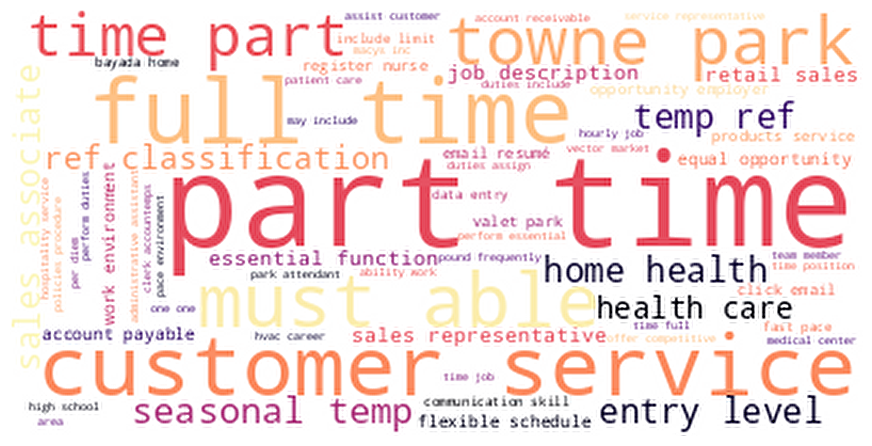

In [85]:
plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
plt.show()
